In [1]:
%matplotlib inline
import numpy
import sympy
import pylab
from matplotlib import pyplot
import  random
import matplotlib.pyplot as plt

__Problem 1: Calculate trajectory of electron over 100 time steps__

In [2]:
#Given/Known variables:

nt = 100 #number of time steps
ts = 10e-11 #s

v_x = 10.0e5 #m/s
v_y = 2.0e5 #m/s
v_z = 1.5e5 #m/s

E_x = 1000. #V/m
E_y = 0
E_z = 0

B = 0.1 #T
e = 1.609e-19 #C
m_e = 9.1094e-31 #kg

In [3]:
#initialize matrix with given values:

"""
    [[E_x  E_y  E_z]
A =  [v_x  v_y  v_z]
     [0     0    B ]]
"""

A = numpy.array([[E_x, E_y, E_z],[v_x, v_y, v_z], [0, 0, B]])
print(A)

[[  1.00000000e+03   0.00000000e+00   0.00000000e+00]
 [  1.00000000e+06   2.00000000e+05   1.50000000e+05]
 [  0.00000000e+00   0.00000000e+00   1.00000000e-01]]


In [4]:
#Calculate the determinant of the VxB matrix: 

numpy.linalg.det(A)

19999999.999999978

In [5]:
#Create an array called n of 100 time steps of 10e-11:

n = numpy.linspace(0, ts*nt, 100)
print("Array of 100 time steps of size 10e-11:")
print()
print(n)

#Find the last number of the array, this tells us the value of n at the final position

lastnum = n[-1]
print()
print("The time at the final time step (where the electron is at its' final position):")
print(lastnum)

Array of 100 time steps of size 10e-11:

[  0.00000000e+00   1.01010101e-10   2.02020202e-10   3.03030303e-10
   4.04040404e-10   5.05050505e-10   6.06060606e-10   7.07070707e-10
   8.08080808e-10   9.09090909e-10   1.01010101e-09   1.11111111e-09
   1.21212121e-09   1.31313131e-09   1.41414141e-09   1.51515152e-09
   1.61616162e-09   1.71717172e-09   1.81818182e-09   1.91919192e-09
   2.02020202e-09   2.12121212e-09   2.22222222e-09   2.32323232e-09
   2.42424242e-09   2.52525253e-09   2.62626263e-09   2.72727273e-09
   2.82828283e-09   2.92929293e-09   3.03030303e-09   3.13131313e-09
   3.23232323e-09   3.33333333e-09   3.43434343e-09   3.53535354e-09
   3.63636364e-09   3.73737374e-09   3.83838384e-09   3.93939394e-09
   4.04040404e-09   4.14141414e-09   4.24242424e-09   4.34343434e-09
   4.44444444e-09   4.54545455e-09   4.64646465e-09   4.74747475e-09
   4.84848485e-09   4.94949495e-09   5.05050505e-09   5.15151515e-09
   5.25252525e-09   5.35353535e-09   5.45454545e-09   5.555555

In [6]:
#Use the integral of the time step (dV/dt) to determine the x and y positions of the electron:

StepX = n/(E_x + ((v_y**n + v_y**(n+1))/2)*B*e/m_e)
print("Location of electron in the x direction at every time step:")
print()
print(StepX)
print()

StepY = n/(E_y - ((v_x**n + v_x**(n+1))/2)*B*e/m_e)
print("Location of electron in the y direction at every time step:")
print()
print(StepY)

Location of electron in the x direction at every time step:

[  0.00000000e+00   5.71868746e-26   1.14373749e-25   1.71560623e-25
   2.28747498e-25   2.85934372e-25   3.43121245e-25   4.00308119e-25
   4.57494993e-25   5.14681866e-25   5.71868740e-25   6.29055613e-25
   6.86242486e-25   7.43429359e-25   8.00616232e-25   8.57803104e-25
   9.14989977e-25   9.72176849e-25   1.02936372e-24   1.08655059e-24
   1.14373747e-24   1.20092434e-24   1.25811121e-24   1.31529808e-24
   1.37248495e-24   1.42967182e-24   1.48685869e-24   1.54404556e-24
   1.60123244e-24   1.65841931e-24   1.71560618e-24   1.77279305e-24
   1.82997992e-24   1.88716679e-24   1.94435366e-24   2.00154053e-24
   2.05872740e-24   2.11591427e-24   2.17310114e-24   2.23028800e-24
   2.28747487e-24   2.34466174e-24   2.40184861e-24   2.45903548e-24
   2.51622235e-24   2.57340922e-24   2.63059609e-24   2.68778295e-24
   2.74496982e-24   2.80215669e-24   2.85934356e-24   2.91653042e-24
   2.97371729e-24   3.03090416e-24   3.088

In [7]:
print("The x location of the electron after 100 time steps is:")
print(StepX[-1])
print()
print("The y location of the electron after 100 time steps is:")
print(StepY[-1])
print()
print("Therefore, the trajectory of the electron after 100 time steps is:")
print("(",StepX[-1],",", StepY[-1], ")")

The x location of the electron after 100 time steps is:
5.66149990138e-24

The y location of the electron after 100 time steps is:
-1.13230449125e-24

Therefore, the trajectory of the electron after 100 time steps is:
( 5.66149990138e-24 , -1.13230449125e-24 )


The electron trajectory is depicted on the plot below:


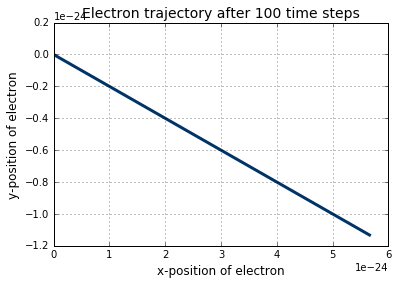

In [8]:
print("The electron trajectory is depicted on the plot below:")
pyplot.plot(StepX, StepY, color='#003366', ls = '-', lw=3)
pyplot.grid(True)
pyplot.xlabel(r'x-position of electron', fontsize=12)
pyplot.ylabel(r'y-position of electron', fontsize=12)
pyplot.title('Electron trajectory after 100 time steps', fontsize=14)

__Problem 2: Calculate Trajectory of ion over 100 time steps__

In [9]:
#Given/Known variables:

nt = 100 #number of time steps
ts = 10e-5 #s

v_x = 1000. #m/s
v_y = 1000. #m/s
v_z = 1000. #m/s

E_x = 1000. #V/m
E_y = 0
E_z = 0

B = 0.1 #T
e = 1.609e-19 #C
m_ion = 1.6605e-27 #kg (He)

In [10]:
#initialize matrix with given values:

"""
    [[E_x  E_y  E_z]
A =  [v_x  v_y  v_z]
     [0     0    B ]]
"""

A = numpy.array([[E_x, E_y, E_z],[v_x, v_y, v_z], [0, 0, B]])
print("VxB matrix:")
print(A)

VxB matrix:
[[  1.00000000e+03   0.00000000e+00   0.00000000e+00]
 [  1.00000000e+03   1.00000000e+03   1.00000000e+03]
 [  0.00000000e+00   0.00000000e+00   1.00000000e-01]]


In [11]:
#Calculate the determinant of the VxB matrix: 

numpy.linalg.det(A)

100000.00000000001

In [12]:
#time steps
n = numpy.linspace(0, ts*nt, 100)
#print(n) --> time steps are the same as for the electron problem

lastnum = n[-1]
print("The time at the final time step (where the He ion is at its' final position):")
print(lastnum)

The time at the final time step (where the He ion is at its' final position):
0.01


In [13]:
#Use the integral of the time step (dV/dt) to determine the x and y positions of the He ion:

StepX = n/(E_x + ((v_y**n + v_y**(n+1))/2)*B*e/m_ion)
print("Location of He ion in the x direction at every time step:")
print()
print(StepX)
print()

StepY = n/(E_y - ((v_x**n + v_x**(n+1))/2)*B*e/m_ion)
print("Location of He ion in the y direction at every time step:")
print()
print(StepY)

Location of He ion in the x direction at every time step:

[  0.00000000e+00   2.08132758e-14   4.15975167e-14   6.23527531e-14
   8.30790153e-14   1.03776334e-13   1.24444738e-13   1.45084260e-13
   1.65694928e-13   1.86276774e-13   2.06829826e-13   2.27354117e-13
   2.47849675e-13   2.68316530e-13   2.88754713e-13   3.09164255e-13
   3.29545184e-13   3.49897530e-13   3.70221325e-13   3.90516597e-13
   4.10783377e-13   4.31021694e-13   4.51231579e-13   4.71413060e-13
   4.91566169e-13   5.11690934e-13   5.31787386e-13   5.51855554e-13
   5.71895467e-13   5.91907156e-13   6.11890650e-13   6.31845979e-13
   6.51773172e-13   6.71672259e-13   6.91543269e-13   7.11386232e-13
   7.31201177e-13   7.50988134e-13   7.70747132e-13   7.90478200e-13
   8.10181368e-13   8.29856666e-13   8.49504121e-13   8.69123765e-13
   8.88715625e-13   9.08279731e-13   9.27816113e-13   9.47324799e-13
   9.66805819e-13   9.86259201e-13   1.00568498e-12   1.02508317e-12
   1.04445382e-12   1.06379694e-12   1.08311

In [14]:
print("The x location of the He ion after 100 time steps is:")
print(StepX[-1])
print()
print("The y location of the He ion after 100 time steps is:")
print(StepY[-1])
print()
print("Therefore, the trajectory of the He ion after 100 time steps is:")
print("(",StepX[-1],",", StepY[-1], ")")

The x location of the He ion after 100 time steps is:
1.92432610058e-12

The y location of the He ion after 100 time steps is:
-1.92432647089e-12

Therefore, the trajectory of the He ion after 100 time steps is:
( 1.92432610058e-12 , -1.92432647089e-12 )


The He ion trajectory is depicted on the plot below:


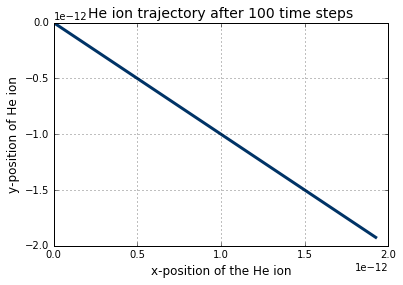

In [15]:
print("The He ion trajectory is depicted on the plot below:")
pyplot.plot(StepX, StepY, color='#003366', ls = '-', lw=3)
pyplot.grid(True)
pyplot.xlabel(r'x-position of the He ion', fontsize=12)
pyplot.ylabel(r'y-position of He ion', fontsize=12)
pyplot.title('He ion trajectory after 100 time steps', fontsize=14)

__Problem 3: Visualize trajectories of 10 electrons and 10 ions in x, y, z. Use random number generator for initial velocities of particles__

In [16]:
#Given/Known variables:

nt = 100 #number of time steps
ts = 10e-5 #s

E_x = 1000. #V/m
E_y = 0
E_z = 0

B = 0.1 #T
e = 1.609e-19 #C
m_ion = 1.6605e-27 #kg (He)
m_e = 9.1094e-31 #kg

particles = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] #we are testing 10 different particles

The electron trajectories is depicted on the plot below:
Each line represents a different particle



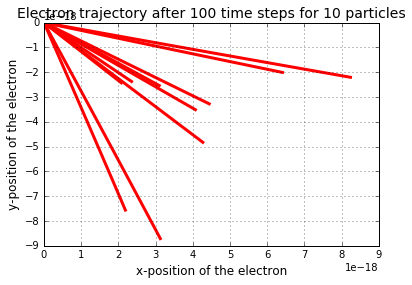

In [17]:
#Use the integral of the time step (dV/dt) to determine the x and y positions of the electron:
#A for loop is used to find the position of 10 different particles
#Initial velocity set to a random number
#Output gives us 10 different arrays of positions of the electron
#Each array represents an electron at 100 different time steps

print("The electron trajectories is depicted on the plot below:")
print("Each line represents a different particle")
print()

for particle in particles:
    
    v_x = random.randrange(1e5,5e5) #m/s
    v_y = random.randrange(1e5,5e5) #m/s
    v_z = random.randrange(1e5,5e5) #m/s
    
    StepXe = n/(E_x + ((v_y**n + v_y**(n+1))/2)*B*e/m_e)
    StepYe = n/(E_y - ((v_x**n + v_x**(n+1))/2)*B*e/m_e)
    
    #print(particle)
    #print(v_x)
    #print(v_y)
    #print(StepXe)
    #print(StepYe)
    
    pyplot.plot(StepXe, StepYe, color='r', ls = '-', lw=3)
    pyplot.grid(True)
    pyplot.xlabel(r'x-position of the electron', fontsize=12)
    pyplot.ylabel(r'y-position of the electron', fontsize=12)
    pyplot.title('Electron trajectory after 100 time steps for 10 particles', fontsize=14)

The He ion trajectories is depicted on the plot below:
Each line represents a different particle



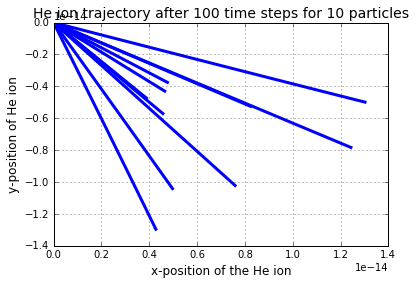

In [18]:
#Use the integral of the time step (dV/dt) to determine the x and y positions of the He ion:
#A for loop is used to find the position of 10 different particles
#Initial velocity set to a random number
#Output gives us 10 different arrays of positions of the He ion
#Each array represents an ion at 100 different time steps

print("The He ion trajectories is depicted on the plot below:")
print("Each line represents a different particle")
print()

for particle in particles:
    
    v_x = random.randrange(1e5,5e5) #m/s
    v_y = random.randrange(1e5,5e5) #m/s
    v_z = random.randrange(1e5,5e5) #m/s
    
    StepXi = n/(E_x + ((v_y**n + v_y**(n+1))/2)*B*e/m_ion)
    StepYi = n/(E_y - ((v_x**n + v_x**(n+1))/2)*B*e/m_ion)
    
    pyplot.plot(StepXi, StepYi, color='b', ls = '-', lw=3)
    pyplot.grid(True)
    pyplot.grid(True)
    pyplot.xlabel(r'x-position of the He ion', fontsize=12)
    pyplot.ylabel(r'y-position of He ion', fontsize=12)
    pyplot.title('He ion trajectory after 100 time steps for 10 particles', fontsize=14)
    